### Importing pandas

In [1]:
import pandas as pd
import numpy as np

### Loading the clean Student Performance DataFile

In [2]:
df=pd.read_csv('StudentsPerformance_clean.csv')

In [3]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_mapped,...,test preparation course_mapped,gender_mapped,total_score,pass/fail,grade,math_pass/fail,reading_pass/fail,writing_pass/fail,pass/fail_mapped,grade_mapped
0,0,female,group B,bachelor's degree,standard,none,72,72,74,2,...,0,1,218,Pass,First,1,1,1,1,2
1,1,female,group C,some college,standard,completed,69,90,88,3,...,1,1,247,Pass,Distinction,1,1,1,1,3
2,2,female,group B,master's degree,standard,none,90,95,93,2,...,0,1,278,Pass,Distinction,1,1,1,1,3
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,1,...,0,2,148,Pass,Second,1,1,1,1,1
4,4,male,group C,some college,standard,none,76,78,75,3,...,0,2,229,Pass,First,1,1,1,1,2


In [4]:
df.columns

Index(['Unnamed: 0', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score', 'race/ethnicity_mapped',
       'parental level of education_mapped', 'lunch_mapped',
       'test preparation course_mapped', 'gender_mapped', 'total_score',
       'pass/fail', 'grade', 'math_pass/fail', 'reading_pass/fail',
       'writing_pass/fail', 'pass/fail_mapped', 'grade_mapped'],
      dtype='object')

## #Prdeciting Pass/Fail

In [5]:
X=df[['math score', 'reading score','writing score','race/ethnicity_mapped','parental level of education_mapped', 'lunch_mapped',
       'test preparation course_mapped','grade_mapped']]       

In [6]:
y=df['pass/fail_mapped']

### Importing  train_test_split and StandardScaler

In [7]:
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import StandardScaler

### Creating Scaler Model

In [8]:
scaler=StandardScaler()

In [9]:
transformedX = scaler.fit_transform(X)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Sampling feature data and test data

In [10]:
X_train,X_test,y_train,y_test=tt(transformedX,y,test_size=0.2,random_state=123)

### Importing RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier

### Fitting X and y in RandomForestClassifier 

In [12]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicitng Pass/fail

In [13]:
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Checking importance of the features

In [14]:
clf.feature_importances_

array([0.232109  , 0.10971637, 0.27553793, 0.00115418, 0.01237428,
       0.01443837, 0.0034789 , 0.35119098])

In [15]:
feature=['math score', 'reading score','writing score','race/ethnicity_mapped','parental level of education_mapped', 'lunch_mapped',
       'test preparation course_mapped','grade_mapped']

In [16]:
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,math score,0.232109
1,reading score,0.109716
2,writing score,0.275538
3,race/ethnicity_mapped,0.001154
4,parental level of education_mapped,0.012374
5,lunch_mapped,0.014438
6,test preparation course_mapped,0.003479
7,grade_mapped,0.351191


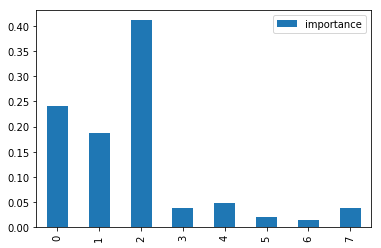

In [40]:
feature_imp.plot.bar()

### Removing the less important features (i.e test_preparation_course_mapped, parental level of education_mapped, lunch_mapped & race/ethnicity_mapped)

In [18]:
X1=df[['math score', 'reading score','writing score','grade_mapped']]

In [19]:
transformedX1 = scaler.fit_transform(X1)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
X1_train,X1_test,y1_train,y1_test=tt(transformedX1,y,test_size=0.2,random_state=123)

### Fiting the the new features and target

In [21]:
clf.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting pass/fail without less importance features

In [22]:
clf.predict(X1_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Again, checking the importance of the features

In [23]:
feature1=['math score', 'reading score','writing score','grade_mapped']

In [24]:
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,math score,0.265018
1,reading score,0.036333
2,writing score,0.136042
3,grade_mapped,0.562608


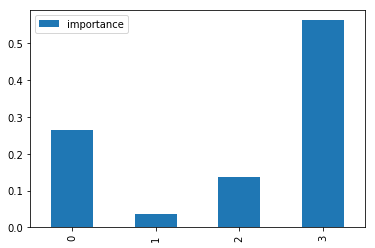

In [25]:
feature_imp1.plot.bar()

### Removing reading score from the feature

In [26]:
X2=df[['math score','writing score','grade_mapped']]

In [27]:
transformedX2 = scaler.fit_transform(X2)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
X2_train,X2_test,y2_train,y2_test=tt(transformedX2,y,test_size=0.2,random_state=123)

### Fiting the the new features and target

In [29]:
clf.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting pass/fail with only the most important features

In [30]:
clf.predict(X2_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## #Predicting Gender

In [31]:
X=df[['math score', 'reading score','writing score','race/ethnicity_mapped','parental level of education_mapped', 'lunch_mapped',
       'test preparation course_mapped','pass/fail_mapped']]    
y=df['gender_mapped']

In [32]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=123)

In [33]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicitng Gender

In [34]:
clf.predict(X_test)

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1], dtype=int64)

### Checking the important features

In [35]:
feature=['math score', 'reading score','writing score','race/ethnicity_mapped','parental level of education_mapped', 'lunch_mapped',
       'test preparation course_mapped','pass/fail_mapped']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,math score,0.241114
1,reading score,0.187483
2,writing score,0.411064
3,race/ethnicity_mapped,0.038866
4,parental level of education_mapped,0.047515
5,lunch_mapped,0.020843
6,test preparation course_mapped,0.013761
7,pass/fail_mapped,0.039353


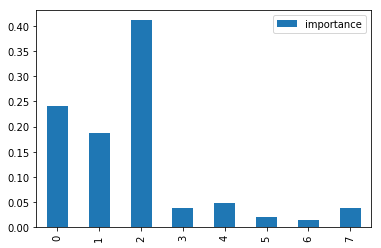

In [36]:
feature_imp.plot.bar()

### Removing the least important feature and predicting gender

In [37]:
X1=df[['math score', 'reading score','writing score','race/ethnicity_mapped','parental level of education_mapped', 'lunch_mapped','pass/fail_mapped']]
X_train,X_test,y_train,y_test=tt(X1,y,test_size=0.2,random_state=123)

In [38]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
clf.predict(X_test)

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       1, 1], dtype=int64)